This notebook is used for generating examples mentioned in my thesis.

In [1]:
from pathlib import Path

path_to_images = Path('./images')
path_to_images.mkdir(parents=True, exist_ok=True)

In [2]:
from nltk.tokenize import word_tokenize

sentence = "We're going shopping today, but yesterday we went to the "
"cinema because shops were closed."
tokens = word_tokenize(sentence.lower())
print(tokens)

['we', "'re", 'going', 'shopping', 'today', ',', 'but', 'yesterday', 'we', 'went', 'to', 'the']


In [3]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer(language='english')
stem_tokens = [stemmer.stem(token) for token in tokens]
print(stem_tokens)

['we', 're', 'go', 'shop', 'today', ',', 'but', 'yesterday', 'we', 'went', 'to', 'the']


In [4]:
from collections import Counter

bag_of_words = Counter(tokens)
print(bag_of_words)
bag_of_words_stem = Counter(stem_tokens)
print(bag_of_words_stem)

Counter({'we': 2, "'re": 1, 'going': 1, 'shopping': 1, 'today': 1, ',': 1, 'but': 1, 'yesterday': 1, 'went': 1, 'to': 1, 'the': 1})
Counter({'we': 2, 're': 1, 'go': 1, 'shop': 1, 'today': 1, ',': 1, 'but': 1, 'yesterday': 1, 'went': 1, 'to': 1, 'the': 1})


In [5]:
from torchtext.vocab import Vocab

vocab = Vocab(bag_of_words, max_size=15, specials=['<unk>'])
word_vector = [vocab.stoi[token] for token in tokens]
print(word_vector)

[1, 2, 5, 6, 9, 3, 4, 11, 1, 10, 8, 7]


In [6]:
import gensim.downloader

glove = gensim.downloader.load('glove-wiki-gigaword-50')

In [7]:
import numpy as np

sample_words = ['king', 'science', 'computer']
vectors = []
labels = []
for sample_word in sample_words:
    vectors.append(glove[sample_word])
    labels.append(sample_word)
    similar_words = glove.most_similar(sample_word, topn=10)
    for word, _ in similar_words:
        vectors.append(glove[word])
        labels.append(word)

vectors = np.asarray(vectors)
vectors.shape

(33, 50)

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_vectors = pca.fit_transform(vectors)
pca_vectors.shape

(33, 2)

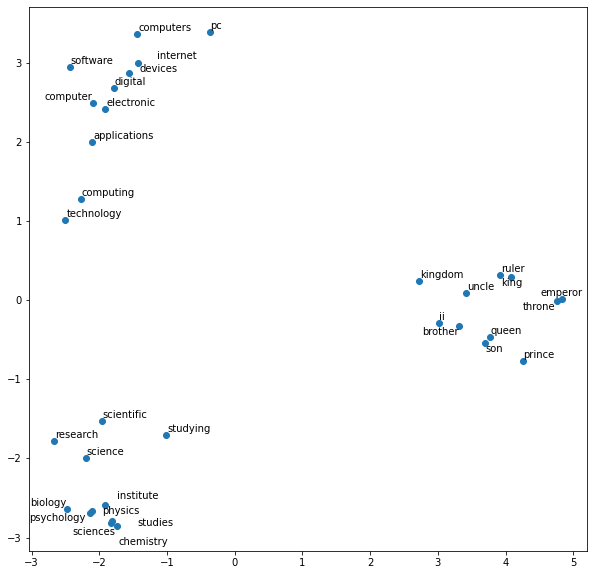

In [9]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

plt.figure(figsize=(10, 10))
plt.scatter(pca_vectors[:, 0], pca_vectors[:, 1])
annotations = []
for i, label in enumerate(labels):
    annotations.append(plt.annotate(label, (pca_vectors[i, 0], pca_vectors[i, 1])))
adjust_text(annotations)
plt.show()

In [10]:
import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_sm')
text = nlp(
    "The European Commission said on Thursday it disagreed with German advice to consumers to shun British lamb until scientists determine whether mad cow disease can be transmitted to sheep. Germany's representative to the European Union's veterinary committee Werner Zwingmann said on Wednesday consumers should buy sheepmeat from countries other than Britain until the scientific advice was clearer. He said further scientific study was required and if it was found that action was needed it should be taken by the European Union."
)
displacy.render(text, style='ent', jupyter=True)

In [11]:
from rouge_score.rouge_scorer import RougeScorer

rouge = RougeScorer(['rouge1', 'rouge2', 'rougeL'])
prediction = 'Today in the zoo we are. Tomorrow cinema.'
target = 'We are going to the zoo today, but tomorrow we will go the cinema.'
scores = rouge.score(target, prediction)
for score, values in scores.items():
    print(score, round(values.fmeasure, 4), end=' ')
print()

rouge1 0.6364 rouge2 0.2 rougeL 0.3636 


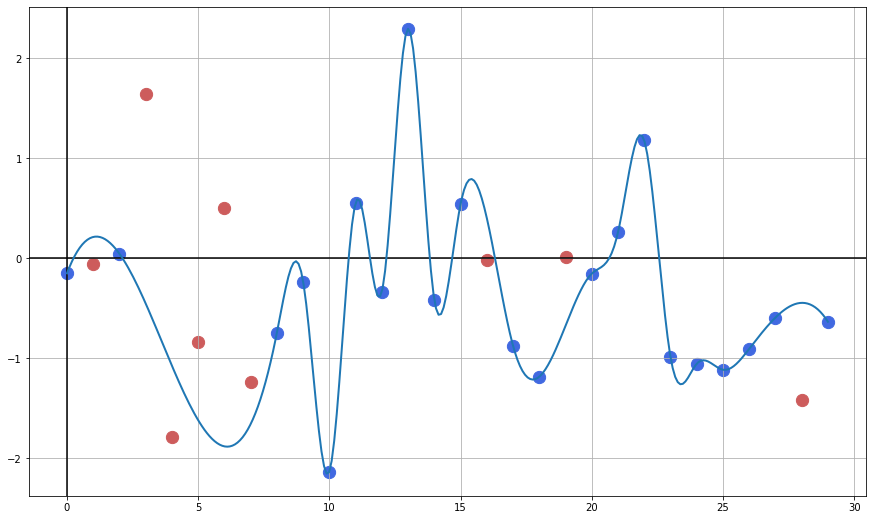

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.interpolate import make_interp_spline, BSpline

np.random.seed(2)
points_x = np.arange(30)
points_y = np.random.randn(30)
train_x, test_x, train_y, test_y = train_test_split(points_x, points_y, train_size=0.7)
train_x.sort()

plt.figure(figsize=(15, 9))
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.scatter(train_x, train_y, c='royalblue', s=150)
plt.scatter(test_x, test_y, c='indianred', s=150)

x_plot = np.linspace(train_x.min(), train_x.max(), 300)
spline = make_interp_spline(train_x, train_y, k=3)  # type: BSpline
y_plot = spline(x_plot)
plt.plot(x_plot, spline(x_plot), lw=2)

plt.savefig('images/overfitting.png')
plt.show()